In [1]:
%pip install geopandas
%pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
import string

## Merging Polygons

In [3]:
gquar = gpd.read_file('Raw Datasets/Quartieri_Bari/Quartieri.shp')

In [4]:
gquar = (
    gquar
        .groupby(by='nome')
        .apply(func=lambda x: x.dissolve())['geometry'] # used to work on sub DF
        .reset_index()
        .drop(columns='level_1')
)

C:\Users\gabry\AppData\Local\Temp\ipykernel_18800\3769092713.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(func=lambda x: x.dissolve())['geometry'] # used to work on sub DF


In [5]:
gquar = gquar.to_crs(4326)

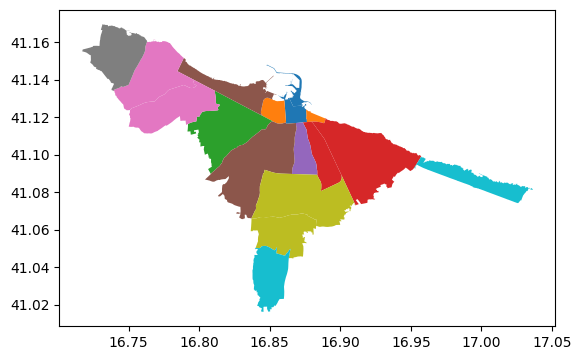

In [6]:
gquar.plot(column='nome');

In [7]:
gquar.to_csv('Raw Datasets\quartieri.csv', sep='\t')

<>:1: SyntaxWarning: invalid escape sequence '\q'
<>:1: SyntaxWarning: invalid escape sequence '\q'
C:\Users\gabry\AppData\Local\Temp\ipykernel_18800\2933493031.py:1: SyntaxWarning: invalid escape sequence '\q'
  gquar.to_csv('Raw Datasets\quartieri.csv', sep='\t')


## Read data

In [8]:
df_crim = pd.read_csv('Raw Datasets\elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep=';')
df_quar = pd.read_csv('Raw Datasets\quartieri.csv', sep='\t')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\q'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\q'
C:\Users\gabry\AppData\Local\Temp\ipykernel_18800\3654460310.py:1: SyntaxWarning: invalid escape sequence '\e'
  df_crim = pd.read_csv('Raw Datasets\elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep=';')
C:\Users\gabry\AppData\Local\Temp\ipykernel_18800\3654460310.py:2: SyntaxWarning: invalid escape sequence '\q'
  df_quar = pd.read_csv('Raw Datasets\quartieri.csv', sep='\t')


## Adding geometry

Normalize names to match the ones in df_crim.

In [9]:
df_quar['nome'] = (
    df_quar
        .loc[:, 'nome']
        .str.lower()
        .map(lambda x: x.split('- ')[1]) # normalize name removing numbers
        .map(lambda x: 'carbonara' if x == 'carbonara di bari' else x) # fix names
        .map(lambda x: 'marconi' if x == 'marconi ' else x)
)

In [10]:
df_crim['Quartiere'] = df_crim['Quartiere'].str.lower()

Map the data to add geometry. First create a dictionary.

In [11]:
mapping = pd.Series(index=df_quar['nome'], data=df_quar['geometry'].to_list()).to_dict()
mapping

{'san nicola': 'MULTIPOLYGON (((16.866082606702122 41.14278111578641, 16.86610389455075 41.142776830099145, 16.866109690989113 41.14279081017564, 16.8661074880186 41.14280506039677, 16.866102494603016 41.142819356737405, 16.8661056776975 41.14283971224093, 16.86610892811684 41.14285584490153, 16.866117333225247 41.14286992321895, 16.866120340803732 41.14288408900302, 16.86611285437676 41.1429023655645, 16.866107975443743 41.142920741286844, 16.86610594520032 41.14294104075682, 16.866111804290526 41.1429572716586, 16.866120149569166 41.142969239618864, 16.866120552496017 41.14298344851187, 16.86612112693918 41.14300370577279, 16.86612425020607 41.14302195091847, 16.866108534157878 41.143032338882094, 16.866087017662966 41.143028606316975, 16.86605992300497 41.1430251046543, 16.866035741988583 41.1430193039306, 16.866011549505785 41.143019695950635, 16.86598475233775 41.14302013017158, 16.86596590154241 41.14301846481453, 16.865946990934756 41.14301468999808, 16.86592848199863 41.1430251

Now the mapping is applied on the main dataframe.

In [12]:
df_crim['geometry'] = df_crim['Quartiere'].map(lambda x: mapping[x])

In [13]:
df_crim.to_csv('elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep='\t')